<a href="https://colab.research.google.com/github/vinayprabhu/Kannada_MNIST/blob/master/colab_notebooks/7_Keras_style_loading_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-plot

# Let's load the dataset, keras style

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from matplotlib import pyplot as plt
import gzip
import os

from keras.utils.data_utils import get_file
import numpy as np


def load_data():
    """Loads the Kannada-MNIST dataset.
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    """
    dirname = os.path.join('datasets', 'Kannada-mnist')
    base = 'https://github.com/vinayprabhu/Kannada_MNIST/blob/master/data/output_tensors/MNIST_format/'
    files = ['y_kannada_MNIST_train-idx1-ubyte.gz', 'X_kannada_MNIST_train-idx3-ubyte.gz',
             'y_kannada_MNIST_test-idx1-ubyte.gz', 'X_kannada_MNIST_test-idx3-ubyte.gz']

    paths = []
    for fname in files:
        paths.append(get_file(fname,
                              origin=base + fname+'?raw=true',
                              cache_subdir=dirname))

    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(imgpath.read(), np.uint8,
                                offset=16).reshape(len(y_train), 28, 28)

    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(imgpath.read(), np.uint8,
                               offset=16).reshape(len(y_test), 28, 28)

    return (x_train, y_train), (x_test, y_test)

Using TensorFlow backend.


In [0]:
# Load the Kannada-MNIST dataset:
(x_train, y_train), (x_test, y_test)=load_data()

# Visualize the images

Text(0.5, 0.98, 'Test set')

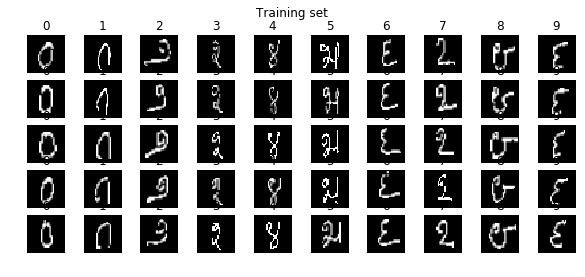

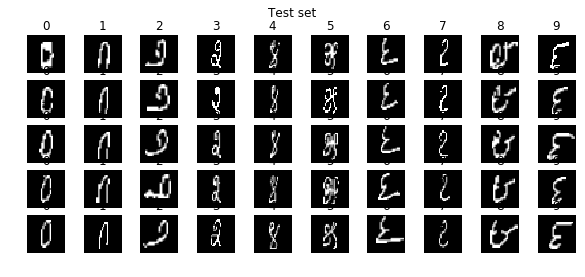

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,4))

for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.axis('Off')
  plt.title(y_train[i])  
# plt.tight_layout()
plt.suptitle('Training set')

plt.figure(figsize=(10,4))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(x_test[i],cmap='gray')
  plt.axis('Off')
  plt.title(y_test[i]) 
# plt.tight_layout()
plt.suptitle('Test set')

# Visualizing the class-wise means

Text(0.5, 0.98, 'Training set - Classwise mean images')

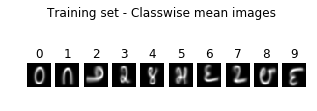

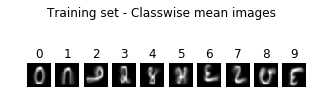

In [5]:
plt.figure(figsize=(5,2))

for i in range(10):
  plt.subplot(1,10,i+1)
  
  plt.imshow(np.mean(x_train[y_train==i],axis=0),cmap='gray')
  plt.axis('Off')
  plt.title(i)  
# plt.tight_layout()
plt.suptitle('Training set - Classwise mean images')

plt.figure(figsize=(5,2))
for i in range(10):
  plt.subplot(1,10,i+1)
  
  plt.imshow(np.mean(x_test[y_test==i],axis=0),cmap='gray')
  plt.axis('Off')
  plt.title(i)  
# plt.tight_layout()
plt.suptitle('Training set - Classwise mean images')

UMAP vizualization.
Source: https://github.com/lmcinnes/umap/blob/master/notebooks/UMAP%20usage%20and%20parameters.ipynb

CPU times: user 34.4 s, sys: 288 ms, total: 34.7 s
Wall time: 34.4 s


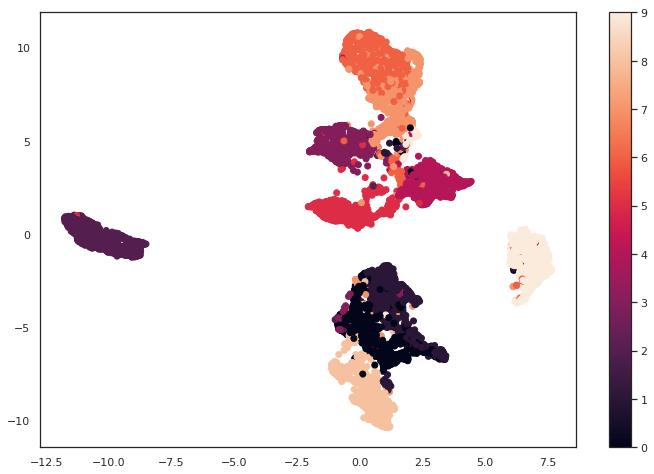

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import umap
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})
np.random.seed(42)

fit = umap.UMAP()
data=x_test.reshape(10000,784)
%time u = fit.fit_transform(data)

plt.scatter(u[:,0], u[:,1], c=y_test)
plt.colorbar()

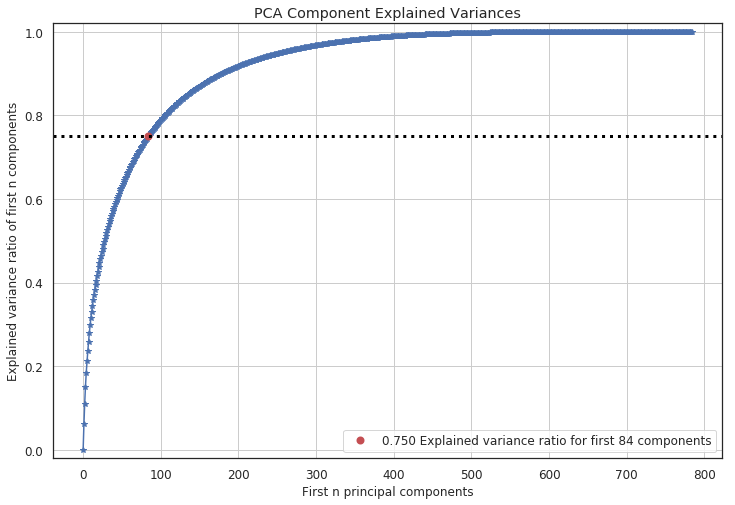

In [7]:
from sklearn.decomposition import PCA
import scikitplot as skplt
pca = PCA(random_state=1)
pca.fit(x_test.reshape(10000,784))
skplt.decomposition.plot_pca_component_variance(pca)
plt.show()

In [8]:
'''Trains a simple convnet on the dataset.
Source: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
'''
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, Y_test))
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0811 01:08:47.732270 139642072532864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 01:08:47.746522 139642072532864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 01:08:47.748915 139642072532864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 01:08:47.776922 139642072532864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0811 01:08:47.780097 139642072532864 deprecation_wrapp

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


W0811 01:08:47.957587 139642072532864 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.1825 - acc: 0.9444 - val_loss: 0.1741 - val_acc: 0.9437
Epoch 2/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0530 - acc: 0.9839 - val_loss: 0.1478 - val_acc: 0.9556
Epoch 3/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0386 - acc: 0.9885 - val_loss: 0.1481 - val_acc: 0.9585
Epoch 4/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0301 - acc: 0.9906 - val_loss: 0.1269 - val_acc: 0.9646
Epoch 5/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0285 - acc: 0.9912 - val_loss: 0.1110 - val_acc: 0.9672
Epoch 6/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0236 - acc: 0.9930 - val_loss: 0.1300 - val_acc: 0.9673
Epoch 7/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0203 - acc: 0.9938 - val_loss: 0.1258 - val_ac

In [0]:
y_pred=model.predict_classes(x_test)

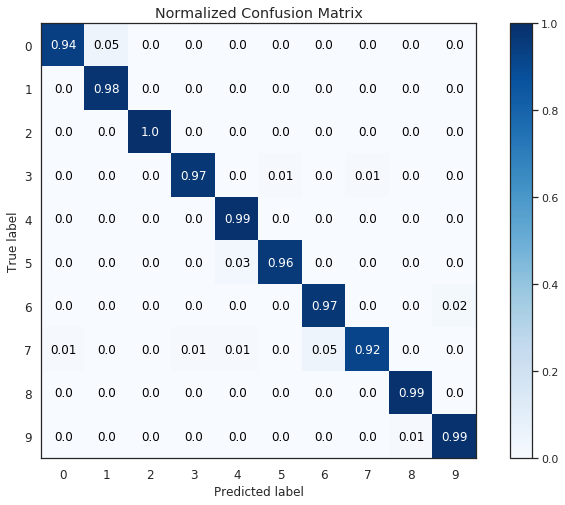

In [10]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()